# Target = 'Rating'

In [195]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
data = pd.read_csv('womens-clothing-clean-2.csv', index_col=0)

In [197]:
data.head(1)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


# Clean Review

In [198]:
import re

In [199]:
def clean_text(x):
    letter_only=re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split())

In [200]:
data['Clean Review']=data['Review Text'].apply(clean_text)

In [201]:
data.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clean Review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comfor...
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress it s sooo pretty i happened to...
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit it s fun flirty...
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...


# Adding Sentiment Features based on the ratings

In [202]:
def turn_into_sentiment(x):
    if((x==1)|(x==2)|(x==3)):
        return 'Worst'
    else:
        return 'Best'

In [203]:
data['Sentiment'] = data['Rating'].apply(turn_into_sentiment)

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as tts

In [205]:
from nltk.corpus import stopwords
from collections import Counter

In [206]:
stop = stopwords.words('english')

In [221]:
stop_2 = ['dress', 'like', 'top', 'would', 'fabric', 'fit', 'size', 'small', 'look', 'love', 
               'back', 'ordered', 'really', 'color', 'much', 'shirt', 'one', 'wear', 'also','material','sweater']

In [222]:
data['Without Stop Words']=data['Clean Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and word not in (stop_2)]))

In [223]:
data['Clean Review'].iloc[0]

'Absolutely wonderful silky and sexy and comfortable'

In [224]:
data['Without Stop Words'].iloc[0]

'Absolutely wonderful silky sexy comfortable'

# Stemming

In [173]:
# from nltk.stem.snowball import SnowballStemmer

In [174]:
# stemmer = SnowballStemmer("english")

In [175]:
# data['stemmed'] = data['Without Stop Words'].str.split()

In [176]:
# # stem every word.
# data['stemmed'] = data['stemmed'].apply(lambda x: [stemmer.stem(y) for y in x])

In [177]:
# # stemmed into string:
# def stemmed_str(x):
#     for item in x:
#         return ' '.join(str(item) for item in x)

In [178]:
# data['stemmed']=data['stemmed'].apply(stemmed_str)

In [179]:
# data['Without Stop Words'].iloc[1]

'Love sooo pretty happened find store glad bc never online bc petite bought petite length hits little knee definitely true midi someone truly petite'

In [180]:
# data['stemmed'].iloc[1]

'love sooo pretti happen find store glad bc never onlin bc petit bought petit length hit littl knee definit true midi someon truli petit'

# Most Words Appear

In [225]:
def show_most_words_appear(data):
    all_words=" ".join(filter(None, list(data)))
    list_all_words=all_words.lower()
    list_all_words = list_all_words.split()
    word_count = Counter(list_all_words)
    word_count_series=pd.Series(word_count)
    most_words_appear =word_count_series.sort_values(ascending=False).head(10)
    plt.figure(figsize=(15,5))
    sns.barplot(most_words_appear.index, most_words_appear.values, palette='viridis')

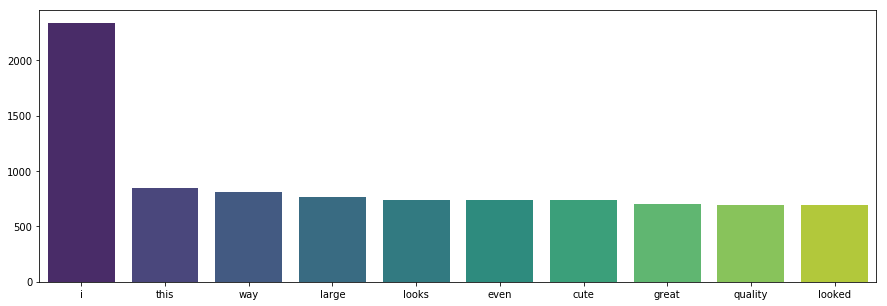

In [226]:
show_most_words_appear(data[data['Sentiment']=='Worst']['Without Stop Words'])

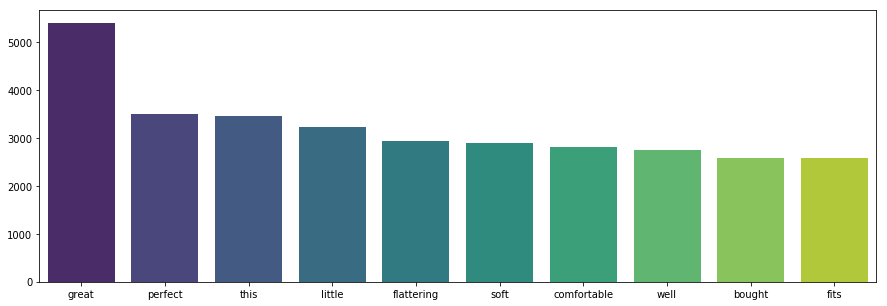

In [214]:
show_most_words_appear(data[data['Sentiment']=='Best']['Without Stop Words'])

# Handling Imbalanced Data

In [227]:
data.Sentiment.value_counts(normalize=True)

Best     0.774384
Worst    0.225616
Name: Sentiment, dtype: float64

In [228]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [230]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [231]:
from sklearn.metrics import confusion_matrix 

### Undersampling

In [233]:
vectorizer = TfidfVectorizer()
X_train,X_test,y_train,y_test = tts(vectorizer.fit_transform(data['Without Stop Words']),data['Sentiment'],random_state=101)

In [236]:
#Test Scoring
list_model = [MultinomialNB, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]
index_model=['NaiveBayes Worst', 'NaiveBayes Best','LogisticRegression Worst','LogisticRegression Best','DecisionTreeClassifier Worst','DecisionTreeClassifier Best','RandomForestClassifier Worst','RandomForestClassifier Best','GradientBoostingClassifier Worst', 'GradientBoostingClassifier Best']

#Undersampling:
minority_data = data[data['Sentiment']=='Worst']
mayority_data = data[data['Sentiment']=='Best']
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))
data_mayority = data.loc[index_for_mayority]
undersampling_data = pd.concat([data_mayority, minority_data])

US_precision = []
US_recall = []
for i,item in enumerate(list_model):
    X_tr, X_ts, y_tr, y_ts=tts(vectorizer.fit_transform(undersampling_data['Clean Review']),undersampling_data['Sentiment'],random_state=101)
    US_model=item()
    US_model.fit(X_tr, y_tr)
    US_predict=US_model.predict(X_ts)
    US_predict_train=US_model.predict(X_tr)
    aa=confusion_matrix(y_ts, US_predict)

    #precision 0
    pre_0=round((aa[0][0])/((aa[0][0])+(aa[1][0])),2)
    US_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((aa[1][1])/((aa[1][1])+(aa[0][1])),2)
    US_precision.append(pre_1)

    #recall 0:
    rec_0=round((aa[0][0])/((aa[0][0])+(aa[0][1])),2)
    US_recall.append(rec_0)

    #recall 1:
    rec_1=(round((aa[1][1])/((aa[1][1])+(aa[1][0])),2))
    US_recall.append(rec_1)
US={'US precision':US_precision, 'US recall':US_recall}
US=pd.DataFrame(US,index=index_model )


#ROS :
ROS_precision = []
ROS_recall = []
for i,item in enumerate(list_model):
    ROS_model = item()
    ros = RandomOverSampler(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    ROS_model.fit(X_ros,y_ros)
    ROS_predict_train=ROS_model.predict(X_ros)
    ROS_predict=ROS_model.predict(X_test)
    bb=confusion_matrix(y_test, ROS_predict)
    
    
    #precision 0
    pre_0=round((bb[0][0])/((bb[0][0])+(bb[1][0])),2)
    ROS_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((bb[1][1])/((bb[1][1])+(bb[0][1])),2)
    ROS_precision.append(pre_1)

    #recall 0:
    rec_0=round((bb[0][0])/((bb[0][0])+(bb[0][1])),2)
    ROS_recall.append(rec_0)

    #recall 1:
    rec_1=(round((bb[1][1])/((bb[1][1])+(bb[1][0])),2))
    ROS_recall.append(rec_1)
    
ROS={'ROS precision':ROS_precision, 'ROS recall':ROS_recall}
ROS=pd.DataFrame(ROS,index=index_model )

    
#SMOTE :
SMOTE_precision = []
SMOTE_recall = []
for i,item in enumerate(list_model):
    SMOTE_model = item()
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train,y_train)
    SMOTE_model.fit(X_sm,y_sm)
    SMOTE_predict=SMOTE_model.predict(X_test)
    SMOTE_predict_train=SMOTE_model.predict(X_sm)
    cc=confusion_matrix(y_test, SMOTE_predict)
    
    
    #precision 0
    pre_0=round((cc[0][0])/((cc[0][0])+(cc[1][0])),2)
    SMOTE_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((cc[1][1])/((cc[1][1])+(cc[0][1])),2)
    SMOTE_precision.append(pre_1)

    #recall 0:
    rec_0=round((cc[0][0])/((cc[0][0])+(cc[0][1])),2)
    SMOTE_recall.append(rec_0)

    #recall 1:
    rec_1=(round((cc[1][1])/((cc[1][1])+(cc[1][0])),2))
    SMOTE_recall.append(rec_1)
    
SMOTE={'SMOTE precision':SMOTE_precision, 'SMOTE recall':SMOTE_recall}
SMOTE=pd.DataFrame(SMOTE,index=index_model)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [237]:
US_accuracytest = accuracy_score(y_ts, US_predict)
ROS_accuracytest = accuracy_score(y_test, ROS_predict)
SMOTE_accuracytest=accuracy_score(y_test, SMOTE_predict)

US_accuracytrain = accuracy_score(y_tr, US_predict_train)
ROS_accuracytrain = accuracy_score(y_ros, ROS_predict_train)
SMOTE_accuracytrain=accuracy_score(y_sm, SMOTE_predict_train)


accuracy_train = [US_accuracytrain,ROS_accuracytrain,SMOTE_accuracytrain]
accuracy_test = [US_accuracytest, ROS_accuracytest, SMOTE_accuracytest]
accuracy = [accuracy_train, accuracy_test]
pd.DataFrame(data=accuracy, columns=['Undersampling', 'RandomOverSampling', 'SMOTE'], index=['Accuracy Train Score', 'Accuracy Test Score'])

,Undersampling,RandomOverSampling,SMOTE
Accuracy Train Score,0.846037,0.824368,0.873836
Accuracy Test Score,0.809253,0.790212,0.842916


In [238]:
test_scoring_df = pd.concat([US,ROS,SMOTE], axis=1)
test_scoring_df

,US precision,US recall,ROS precision,ROS recall,SMOTE precision,SMOTE recall
NaiveBayes Worst,0.84,0.83,0.95,0.85,0.95,0.85
NaiveBayes Best,0.84,0.85,0.60,0.83,0.60,0.83
LogisticRegression Worst,0.85,0.85,0.95,0.87,0.94,0.88
LogisticRegression Best,0.86,0.86,0.63,0.83,0.65,0.81
DecisionTreeClassifier Worst,0.70,0.76,0.87,0.85,0.87,0.84
DecisionTreeClassifier Best,0.75,0.69,0.51,0.54,0.49,0.55
RandomForestClassifier Worst,0.72,0.83,0.87,0.94,0.86,0.93
RandomForestClassifier Best,0.81,0.70,0.69,0.49,0.65,0.48
GradientBoostingClassifier Worst,0.79,0.83,0.93,0.79,0.89,0.92
GradientBoostingClassifier Best,0.83,0.79,0.51,0.80,0.66,0.58


# Simple Prediction

In [246]:
data.reset_index(inplace=True)

In [249]:
data.drop(columns='index', inplace=True)

In [255]:
data[data['Rating']==4]['Clean Review'].index

Int64Index([    0,     7,    15,    20,    21,    27,    35,    36,    40,
               43,
            ...
            23344, 23345, 23349, 23351, 23353, 23356, 23359, 23361, 23366,
            23367],
           dtype='int64', length=5066)

In [268]:
data['Clean Review'].iloc[23367]

'I m so impressed with the beautiful color combinations and embroidery but disappointed in the rayon fabric used especially at this price point the sleeveless sheer blue outer dress is a flowy swing silhouette that retains many wrinkles i have thick shoulders and upper arms so the armholes cut into my armpits the silky rayon liner is a blush rose color with adjustable spaghetti straps the slip has no stretch and feels a bit tight on my chest i ordered size medium petite and my stats a'

In [269]:
tes=data['Clean Review'].iloc[23367]

In [270]:
tes1 = vectorizer.transform([tes])
model_optim=LogisticRegression().fit(X_tr, y_tr)
predict_model = model_optim.predict(tes1)[0]
predict_model

'Best'

# Pipeline

In [271]:
from sklearn.pipeline import Pipeline

In [272]:
pipe = Pipeline([
    ('cv',TfidfVectorizer()),
    ('model',LogisticRegression())
])


In [273]:
from sklearn.model_selection import train_test_split as tts

In [274]:
xpipe_tr, xpipe_ts, ypipe_tr, ypipe_ts = tts(undersampling_data['Clean Review'],undersampling_data['Sentiment'],random_state=101)

In [275]:
pipe.fit(xpipe_tr, ypipe_tr)

Pipeline(memory=None,
     steps=[('cv', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [279]:
undersampling_data[undersampling_data['Sentiment']=='Worst'].index

Int64Index([    2,     5,    10,    14,    16,    22,    23,    25,    26,
               33,
            ...
            23449, 23450, 23452, 23460, 23462, 23475, 23478, 23482, 23483,
            23484],
           dtype='int64', length=5274)

In [281]:
ypipe_ts.iloc[5]

'Best'

In [282]:
pipe.predict([xpipe_ts.iloc[5]])[0]

'Best'

In [283]:
prediction_=pipe.predict(xpipe_ts)
print(classification_report(ypipe_ts,prediction_))

              precision    recall  f1-score   support

        Best       0.86      0.85      0.85      1288
       Worst       0.86      0.86      0.86      1349

   micro avg       0.86      0.86      0.86      2637
   macro avg       0.86      0.86      0.86      2637
weighted avg       0.86      0.86      0.86      2637



# Export CSV

In [284]:
import pickle

In [285]:
filename = 'pipeline_nlp2.sav'
pickle.dump(pipe, open(filename, 'wb'))

In [286]:
data.to_csv('womens-clothing-clean-2-done.csv')

# Extra

In [ ]:
#Wordcloud
from wordcloud import WordCloud

In [ ]:
def show_wordcloud(text):
    wc = WordCloud(background_color='white', max_font_size=40, max_words=200)
    my_wc = wc.generate(text)
    plt.figure(figsize=(25,6))
    plt.imshow(my_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show

In [ ]:
show_wordcloud(' '.join(list(data[data['Sentiment']=='Best']['Without Stop Words'])))

In [ ]:
show_wordcloud(' '.join(list(data[data['Sentiment']=='Worst']['Without Stop Words'])))